## Exploratory Analysis

In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
pd.options.plotting.backend = "plotly"

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.__version__

'1.1.3'

In [6]:
np.__version__

'1.19.2'

In [7]:
seaborn.__version__

'0.11.0'

## Earthquakes

In [8]:
earthquakes = pd.read_csv('earthquakes-2021-01-19_21-44-08_-0500.tsv', sep = '\t')
earthquakes.shape

(6217, 39)

In [9]:
earthquakes.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [10]:
earthquakes.columns

Index(['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)',
       'Mag', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')

Cantidad de nulos por columna

In [11]:
earthquakes = earthquakes[earthquakes['Search Parameters'].isnull()]
earthquakes = earthquakes.drop('Search Parameters', axis = 1)

In [12]:
earthquakes.isnull().sum()

Year                                     0
Mo                                     408
Dy                                     562
Hr                                    2043
Mn                                    2247
Sec                                   1848
Tsu                                   4345
Vol                                   6148
Location Name                            1
Latitude                                48
Longitude                               48
Focal Depth (km)                      2964
Mag                                   1790
MMI Int                               3362
Deaths                                4143
Death Description                     3660
Missing                               6195
Missing Description                   6195
Injuries                              4967
Injuries Description                  4779
Damage ($Mil)                         5704
Damage Description                    1759
Houses Destroyed                      5428
Houses Dest

In [13]:
earthquakes[earthquakes['Location Name'].isnull()]

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
2041,1868.0,10.0,18.0,12.0,35.0,NaN,5508.0,NaN,NaN,-40.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Periodo de análisis

In [14]:
earthquakes['Year'].min(), earthquakes['Year'].max()

(-2150.0, 2021.0)

Años negativos

In [15]:
earthquakes['Era'] = np.where(earthquakes['Year'] < 0, 'AC', 'BC')

In [16]:
earthquakes['Era'].isnull().sum()

0

In [17]:
earthquakes['Era'].value_counts()

BC    6167
AC      49
Name: Era, dtype: int64

Décadas y siglos

In [18]:
earthquakes['Decade'] = (earthquakes['Year'] / 10).astype('int')
earthquakes['Century'] = (earthquakes['Year'] // 100).astype('int') + 1

Siglo 21

In [19]:
earthquake_21 = earthquakes.query('Century >= 20')

In [20]:
earthquake_21.shape

(3741, 41)

In [21]:
earthquake_21.isnull().sum()

Year                                     0
Mo                                       7
Dy                                      12
Hr                                     193
Mn                                     221
Sec                                    264
Tsu                                   2698
Vol                                   3714
Location Name                            0
Latitude                                 6
Longitude                                6
Focal Depth (km)                       716
Mag                                    308
MMI Int                               2262
Deaths                                2277
Death Description                     2179
Missing                               3721
Missing Description                   3722
Injuries                              2556
Injuries Description                  2400
Damage ($Mil)                         3242
Damage Description                    1007
Houses Destroyed                      3102
Houses Dest

In [22]:
earthquake_21[['Location Name']]

,Location Name
2476,INDONESIA: GALELA (HALMAHERA ISLAND)
2477,JAPAN: SEA OF JAPAN
2478,INDONESIA: JAVA: SUKABUMI
2479,MEXICO
2480,MEXICO: NEAR COAST OF JALISCO
...,...
6212,ALASKA
6213,GREECE: SAMOS; TURKEY: IZMIR
6214,CHILE: OFF COAST CENTRAL
6215,BALKANS NW: CROATIA: PETRINJA


Countries with more earthquakes since 1900

In [23]:
earthquake_21['Country'] = earthquake_21['Location Name'].str.split(':', expand = True)[0]

In [24]:
counts = earthquake_21['Country'].value_counts()
counts

CHINA                      362
INDONESIA                  283
IRAN                       218
JAPAN                      212
TURKEY                     169
                          ... 
BURUNDI                      1
JORDAN                       1
BOSNIA-HERZEGOVINA           1
INDIA-BANGLADESH BORDER      1
SWITZERLAND                  1
Name: Country, Length: 252, dtype: int64

In [25]:
list_countries = counts.iloc[:10]
list_countries.index

Index(['CHINA', 'INDONESIA', 'IRAN', 'JAPAN', 'TURKEY', 'ITALY', 'PHILIPPINES',
       'RUSSIA', 'CHILE', 'PERU'],
      dtype='object')

In [32]:
cuentas = earthquake_21.rename(columns = {'Location Name': 'Cantidad'})\
                        .get(['Country', 'Cantidad'])\
                        .groupby('Country', as_index = False)\
                        .count()\
                        .sort_values(by = 'Cantidad', ascending = False)

In [33]:
cuentas.head()

,Country,Cantidad
43,CHINA,362
100,INDONESIA,283
102,IRAN,218
111,JAPAN,212
228,TURKEY,169


Countries with more earthquakes

In [41]:
cuentas.head(20).plot(kind = 'bar', y = 'Cantidad', x = 'Country', hover_data =['Cantidad'])

### Damage evaluation

<AxesSubplot:>

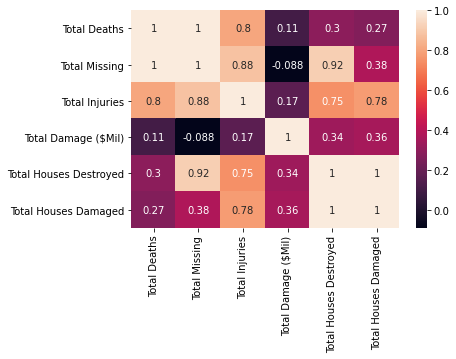

In [85]:
damage_columns = ['Total Deaths', 'Total Missing', 'Total Injuries',
                  'Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Houses Damaged']
seaborn.heatmap(earthquake_21[damage_columns].corr(), annot = True)

Porcentaje de terremotos que ocasionan un tsunami de acuerdo a la zona geográfica

In [80]:
earthquake_21['Tsu'].notnull().mean()

0.2788024592354985

In [87]:
earthquake_21.get(['Mag', 'Tsu']).dropna().shape

(937, 2)

Cantidad de casas destruidas en promedio por país

Comparación de daños cuando un terremoto tiene tsunami

In [68]:
def plotly_comparison_tsunami(earthquakes, column, year):
    
    tsu = earthquakes[earthquakes['Tsu'].notnull()]
    
    comparison_tsu = earthquake_21.get(['Year', column]).groupby('Year').mean()
    comparison_tsu['tsu'] = tsu.get(['Year', column]).groupby('Year').mean()
    
    comparison_tsu = comparison_tsu.rename(columns = {column: 'without Tsunami', 'tsu': 'with Tsunami'})
    
    return comparison_tsu[year:].plot(kind = 'line', title=f'{column} comparison')

In [71]:
plotly_comparison_tsunami(earthquake_21, 'Mag', 1960)

Referencia del covid amigo https://covid-seguimiento.amigocloud.com/?fbclid=IwAR1hXSAbhc2yrAnUL_EPd4NYJSC5cN0qRLSaBM7IwyuXglj899cyS7-b2yk